In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from sklearn import ensemble

In [22]:
data = pd.read_excel("C:/Users/HP/Desktop/salary_data.xlsx")
data.head()

,date,GDP,inflation,employment_status,retail_sales,oil_price,gas_price,gasoline_prise,USD,EUR,loans_deposits,salary
0,1999-01-01,279,8.38,60.4,121.8,391,49.6,1156,22.60,25.79,469.4,1167.0
1,1999-02-01,302,4.13,61.1,122.9,408,54.2,1218,22.86,25.11,500.6,1199.0
2,1999-03-01,320,2.79,61.7,134.3,426,54.8,1289,24.18,25.94,514.2,1385.0
3,1999-04-01,342,3.03,61.7,135.4,447,54.7,1494,24.23,25.73,537.4,1423.0
4,1999-05-01,369,2.22,61.7,138.9,475,54.0,1547,24.44,25.52,552.6,1472.0


In [23]:
data.shape

(300, 12)

In [24]:
data.columns

Index(['date', 'GDP', ' inflation', 'employment_status', 'retail_sales',
       'oil_price', 'gas_price', 'gasoline_prise', 'USD', 'EUR',
       'loans_deposits', 'salary'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               300 non-null    datetime64[ns]
 1   GDP                300 non-null    int64         
 2    inflation         300 non-null    float64       
 3   employment_status  300 non-null    float64       
 4   retail_sales       300 non-null    float64       
 5   oil_price          300 non-null    int64         
 6   gas_price          300 non-null    float64       
 7   gasoline_prise     300 non-null    int64         
 8   USD                300 non-null    float64       
 9   EUR                300 non-null    float64       
 10  loans_deposits     300 non-null    float64       
 11  salary             300 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 28.3 KB


In [26]:
data.isnull().sum()

date                 0
GDP                  0
 inflation           0
employment_status    0
retail_sales         0
oil_price            0
gas_price            0
gasoline_prise       0
USD                  0
EUR                  0
loans_deposits       0
salary               0
dtype: int64

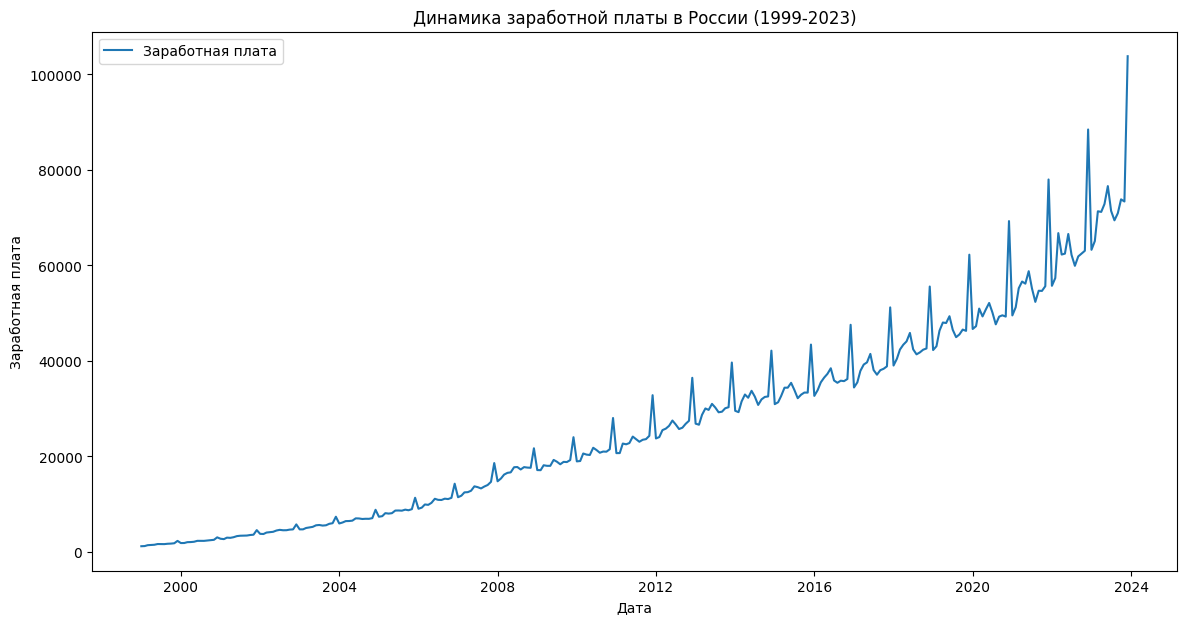

In [27]:
# Графическое отображение динамики заработной платы
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['salary'], label='Заработная плата')
plt.xlabel('Дата')
plt.ylabel('Заработная плата')
plt.title('Динамика заработной платы в России (1999-2023)')
plt.legend()
plt.show()

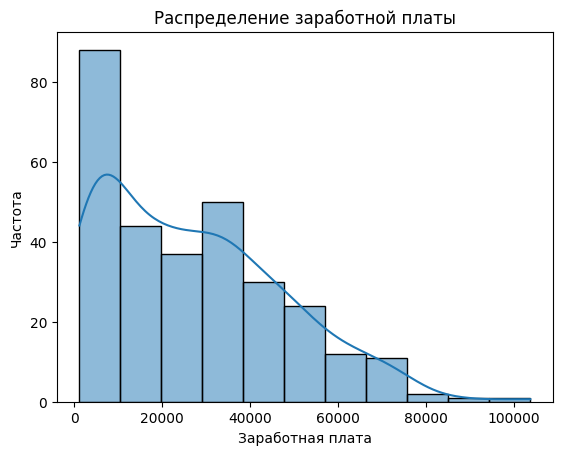

sklearn.ensemble._iforest.IsolationForest

In [28]:
sns.histplot(data['salary'], kde=True)
plt.title('Распределение заработной платы')
plt.xlabel('Заработная плата')
plt.ylabel('Частота')
plt.show()
ensemble.IsolationForest 

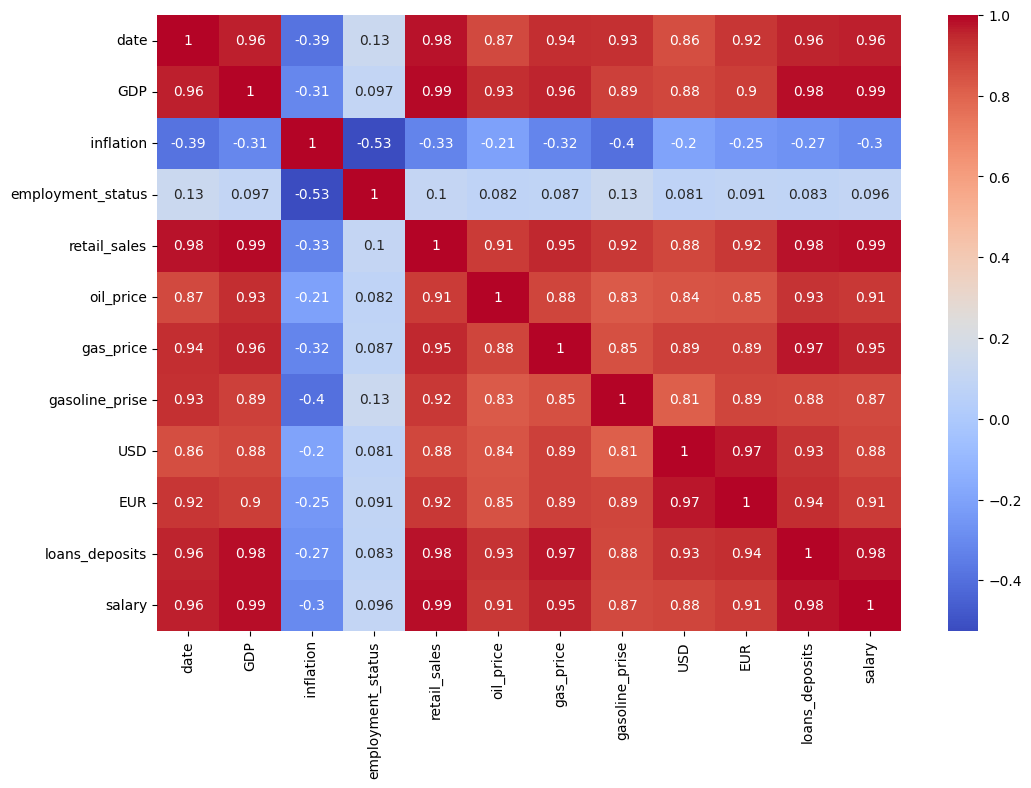

In [29]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

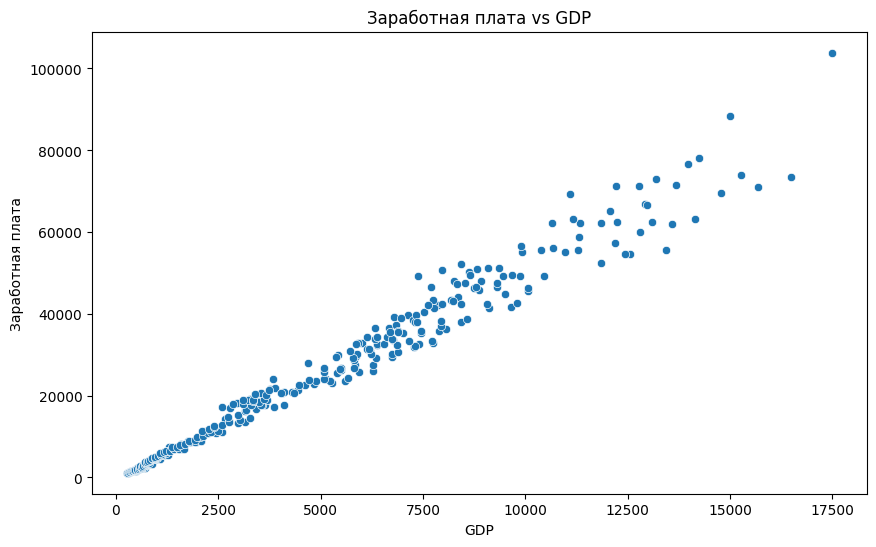

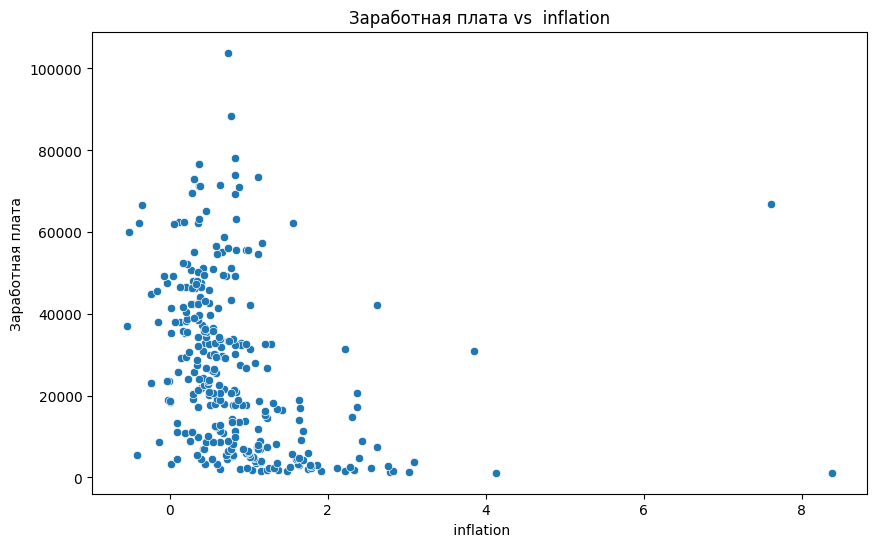

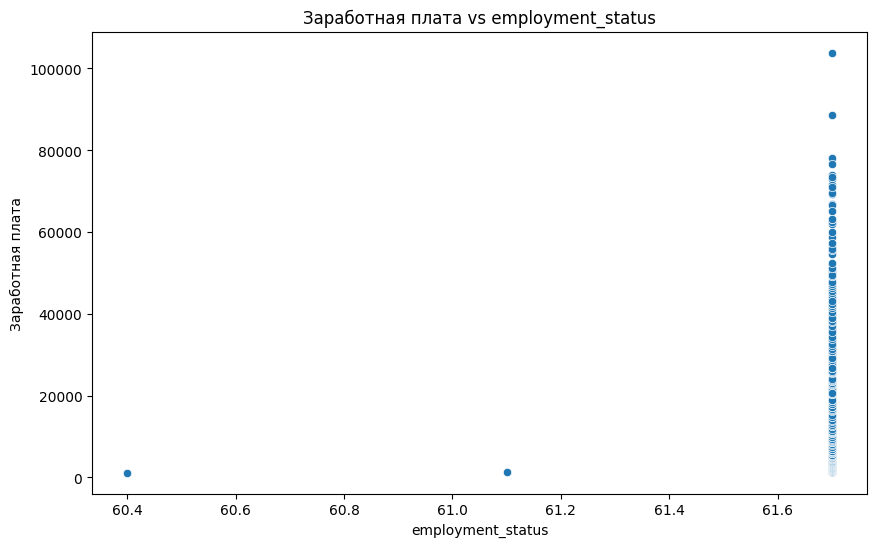

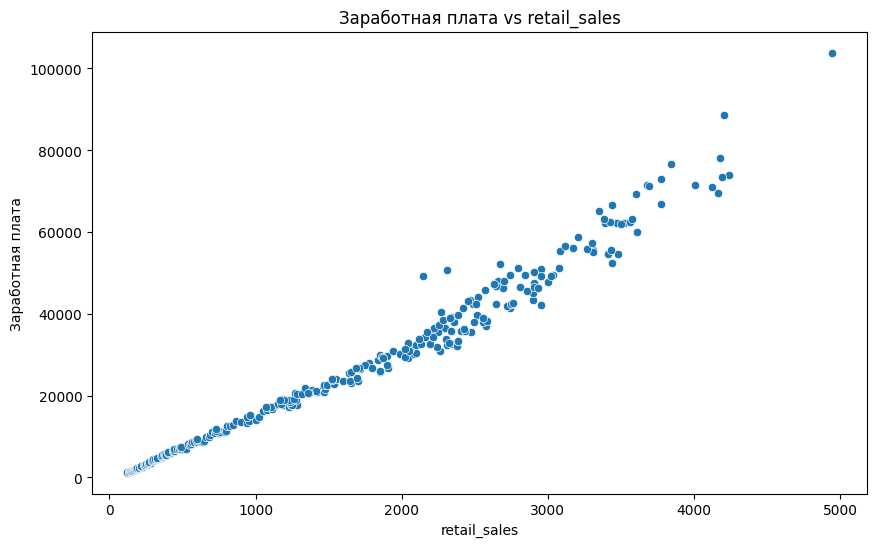

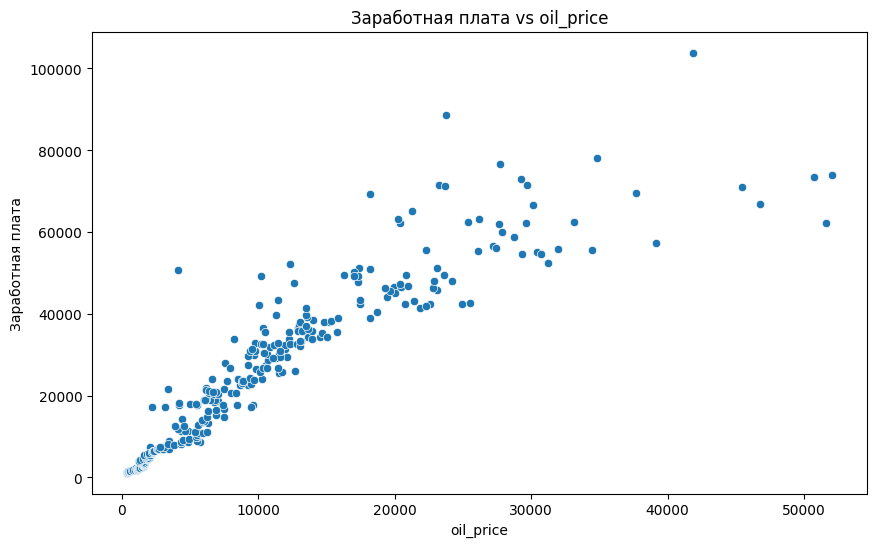

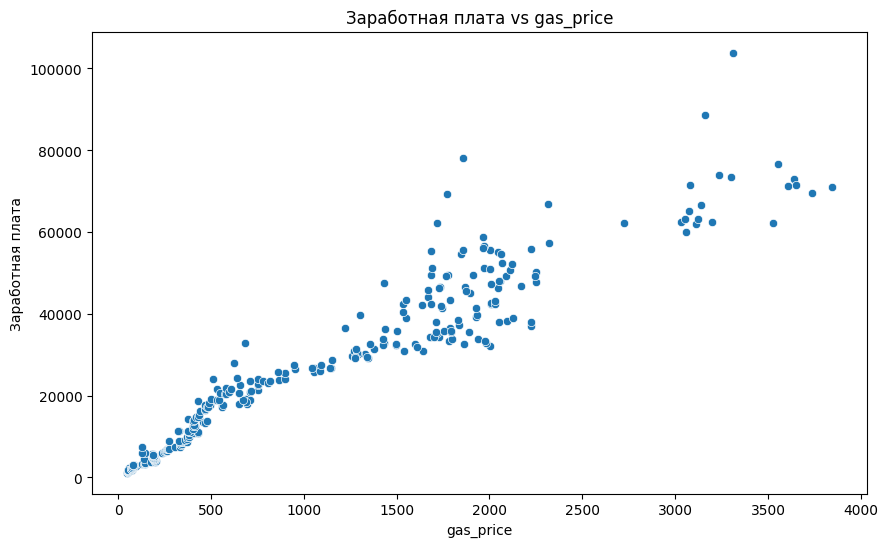

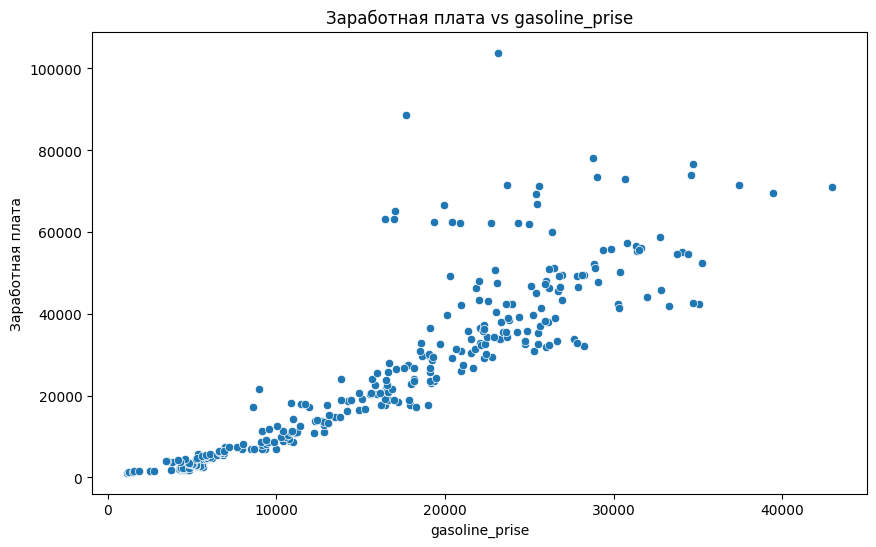

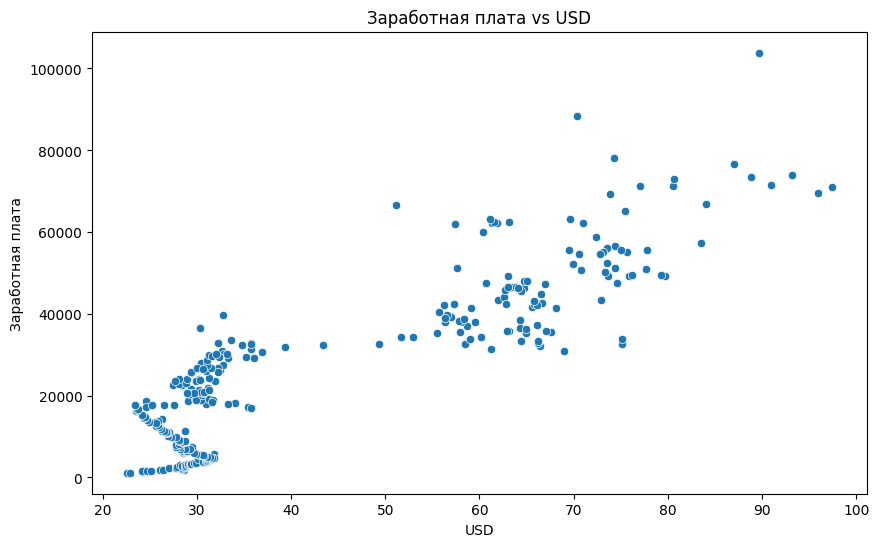

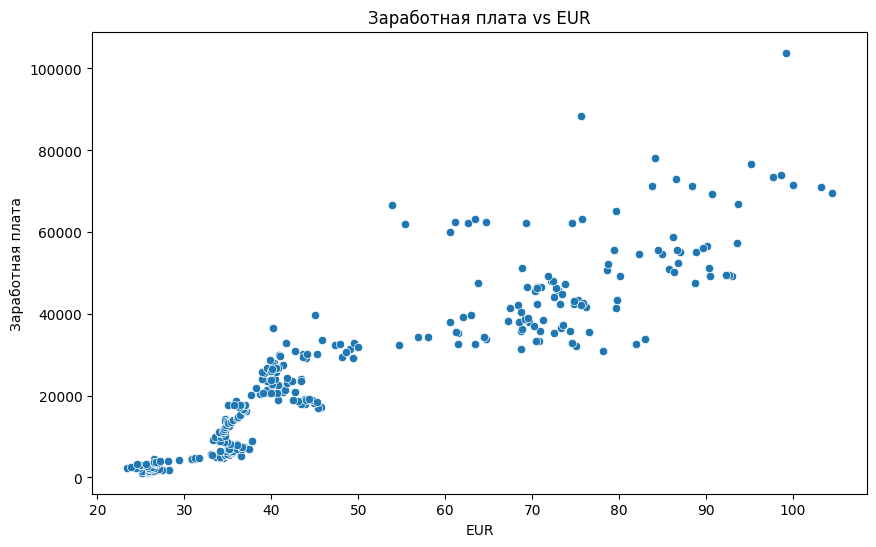

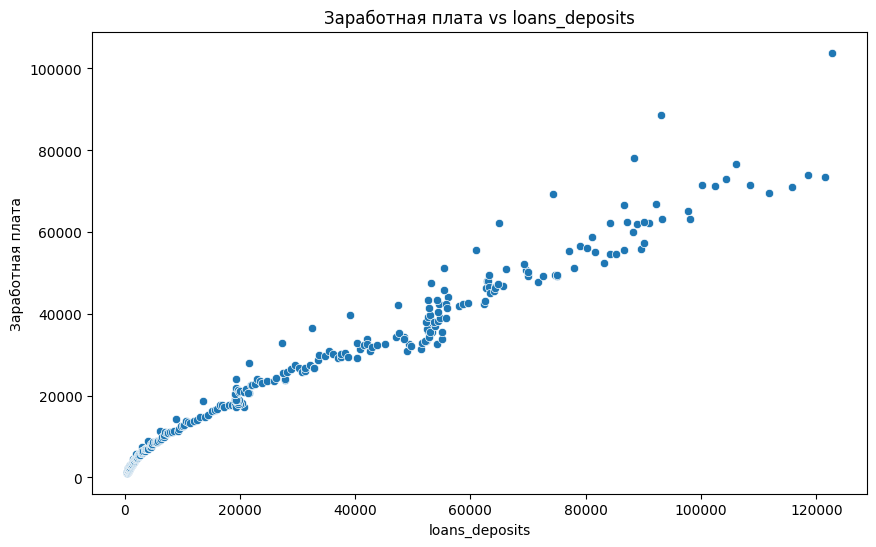

In [30]:
# Взаимосвязь заработной платы с основными признаками
features = ['GDP', ' inflation', 'employment_status', 'retail_sales', 'oil_price', 'gas_price', 'gasoline_prise', 'USD', 'EUR', 'loans_deposits']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data['salary'])
    plt.title(f'Заработная плата vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Заработная плата')
    plt.show()

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
X = data[features]
y = data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
features

['GDP',
 ' inflation',
 'employment_status',
 'retail_sales',
 'oil_price',
 'gas_price',
 'gasoline_prise',
 'USD',
 'EUR',
 'loans_deposits']

In [76]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [77]:
# Обучение и оценка моделей с кросс-валидацией
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Кросс-валидация
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()
    cv_std = cv_scores.std()
    
    print(f'{name}:')
    print(f'  Test MSE={mse}, R2={r2}')
    print(f'  CV MSE={cv_mse} (+/- {cv_std})')
    print('***********************')

Linear Regression:
  Test MSE=5027368.1005412815, R2=0.9879354998618559
  CV MSE=12065471.063589752 (+/- 14687976.156630876)
***********************
Random Forest:
  Test MSE=4209601.926706779, R2=0.9898979461995597
  CV MSE=52036696.07317821 (+/- 80529113.5723179)
***********************
Gradient Boosting:
  Test MSE=5560614.124565658, R2=0.9866558349155367
  CV MSE=47355740.15142475 (+/- 64368853.0928789)
***********************


In [64]:
# Удаление выбросов с использованием Z-оценки
z_scores = np.abs(zscore(X))
filtered_entries = (z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

In [65]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Определение моделей
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [82]:
# Обучение модели и сохранение в переменную 
lr_model = models['Linear Regression'].fit(X_train_scaled, y_train)
rf_model = models['Random Forest'].fit(X_train_scaled, y_train)
gb_model = models['Gradient Boosting'].fit(X_train_scaled, y_train)

In [83]:
# Настройка гиперпараметров с использованием GridSearchCV
parameters = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}

In [84]:
best_models = {}
for name, model in models.items():
    if name in parameters:
        grid_search = GridSearchCV(model, parameters[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        best_models[name] = model.fit(X_train_scaled, y_train)

In [85]:
# Оценка производительности моделей
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -np.mean(cv_scores)
    cv_std = np.std(cv_scores)
    
    print(f'{name}:')
    print(f'  Test MSE={mse:.2f}, R2={r2:.2f}')
    print(f'  Test MAE={mae:.2f}, MedAE={medae:.2f}')
    print(f'  CV MSE={cv_mse:.2f} (+/- {cv_std:.2f})')
    print('***********************')

Linear Regression:
  Test MSE=5027368.10, R2=0.99
  Test MAE=1504.75, MedAE=795.85
  CV MSE=6775528.82 (+/- 1643258.20)
***********************
Random Forest:
  Test MSE=4568565.07, R2=0.99
  Test MAE=1333.18, MedAE=637.09
  CV MSE=6593278.75 (+/- 3213747.62)
***********************
Gradient Boosting:
  Test MSE=3984197.71, R2=0.99
  Test MAE=1180.57, MedAE=508.49
  CV MSE=7705702.92 (+/- 4153539.84)
***********************


In [86]:
train_data = data[data['date'] < '2023-01-01']
test_data = data[data['date'] >= '2023-01-01']
test_dates = test_data['date']

In [87]:
def forecast_with_prophet(data, feature, periods=12):
    df = data[['date', feature]].rename(columns={'date': 'ds', feature: 'y'})
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=periods, freq='MS')
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']].rename(columns={'ds': 'date', 'yhat': feature})

In [88]:
future_test_data = pd.DataFrame(test_dates, columns=['date'])

for feature in features:
    forecast = forecast_with_prophet(train_data, feature)
    future_test_data = future_test_data.merge(forecast, on='date', how='left')

21:34:11 - cmdstanpy - INFO - Chain [1] start processing
21:34:11 - cmdstanpy - INFO - Chain [1] done processing
21:34:12 - cmdstanpy - INFO - Chain [1] start processing
21:34:12 - cmdstanpy - INFO - Chain [1] done processing
21:34:12 - cmdstanpy - INFO - Chain [1] start processing
21:34:12 - cmdstanpy - INFO - Chain [1] done processing
21:34:12 - cmdstanpy - INFO - Chain [1] start processing
21:34:13 - cmdstanpy - INFO - Chain [1] done processing
21:34:13 - cmdstanpy - INFO - Chain [1] start processing
21:34:13 - cmdstanpy - INFO - Chain [1] done processing
21:34:13 - cmdstanpy - INFO - Chain [1] start processing
21:34:13 - cmdstanpy - INFO - Chain [1] done processing
21:34:13 - cmdstanpy - INFO - Chain [1] start processing
21:34:13 - cmdstanpy - INFO - Chain [1] done processing
21:34:14 - cmdstanpy - INFO - Chain [1] start processing
21:34:14 - cmdstanpy - INFO - Chain [1] done processing
21:34:14 - cmdstanpy - INFO - Chain [1] start processing
21:34:14 - cmdstanpy - INFO - Chain [1]

In [89]:
# Нормализация тестовых данных
future_test_data_scaled = scaler.transform(future_test_data[features])

In [90]:
# Прогнозирование с использованием Gradient Boosting модели на 2023 год
test_predictions = lr_model.predict(future_test_data_scaled)

In [91]:
# Добавление прогнозов в DataFrame
future_test_data['predicted_salary'] = test_predictions

In [94]:
# Вывод прогнозов в числовом виде
future_test_data[['date', 'predicted_salary']]

,date,predicted_salary
0,2023-01-01,64654.331139
1,2023-02-01,65021.059312
2,2023-03-01,66936.869465
3,2023-04-01,66923.010565
4,2023-05-01,66874.921616
5,2023-06-01,67093.053747
6,2023-07-01,67608.695596
7,2023-08-01,68748.560923
8,2023-09-01,68758.445533
9,2023-10-01,69937.264800


In [95]:
comparison = test_data[['date', 'salary']].merge(future_test_data[['date', 'predicted_salary']], on='date')
comparison

,date,salary,predicted_salary
0,2023-01-01,63260.0,64654.331139
1,2023-02-01,65094.0,65021.059312
2,2023-03-01,71334.0,66936.869465
3,2023-04-01,71204.0,66923.010565
4,2023-05-01,72851.0,66874.921616
5,2023-06-01,76604.0,67093.053747
6,2023-07-01,71419.4,67608.695596
7,2023-08-01,69439.0,68748.560923
8,2023-09-01,70922.0,68758.445533
9,2023-10-01,73830.0,69937.264800


In [96]:
future_dates = pd.date_range(start='2024-01-01', end='2030-12-01', freq='MS')
future_data = pd.DataFrame(future_dates, columns=['date'])

In [106]:
for feature in features:
    forecast = forecast_with_prophet(data, feature, periods=len(future_dates))
    future_data = future_data.merge(forecast, on='date', how='left')

In [98]:
future_data_scaled = scaler.transform(future_data[features])

In [99]:
future_predictions = lr_model.predict(future_data_scaled)

In [100]:
future_data['predicted_salary'] = future_predictions

In [101]:
future_test_data['predicted_salary'] = test_predictions

In [102]:
print(future_data[['date', 'predicted_salary']])

         date  predicted_salary
0  2024-01-01      74302.190473
1  2024-02-01      74796.533371
2  2024-03-01      77307.758885
3  2024-04-01      76490.201548
4  2024-05-01      76952.289860
..        ...               ...
79 2030-08-01     119159.148080
80 2030-09-01     119145.170365
81 2030-10-01     120634.847069
82 2030-11-01     121583.566214
83 2030-12-01     127539.797156

[84 rows x 2 columns]


In [107]:
future_data[['date', 'predicted_salary']].to_csv('predicted_salaries_2024_2030.csv', index=False)

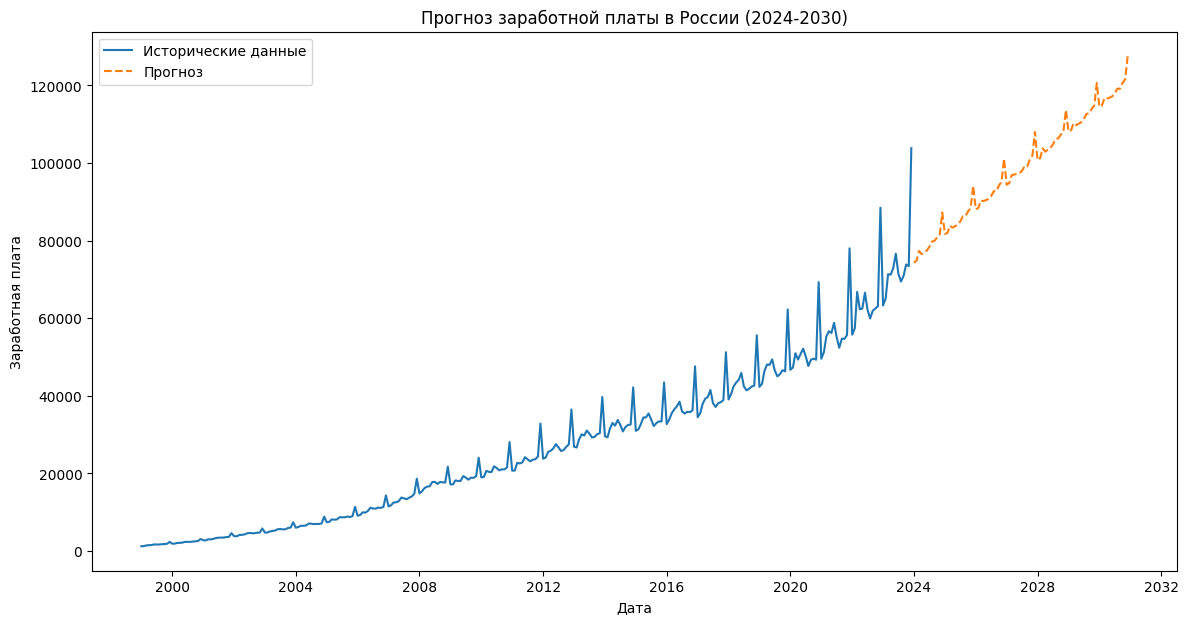

In [108]:
# Отображение результатов
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['salary'], label='Исторические данные')
plt.plot(future_data['date'], future_data['predicted_salary'], label='Прогноз', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Заработная плата')
plt.title('Прогноз заработной платы в России (2024-2030)')
plt.legend()
plt.show()